# Chapter 3: Graphical Causal Models

## Thinking About Causality with Graphs

Graphical models are the language of causality. A causal graphical model is a way to represent how causality works in terms of what causes what.


**Example: the effect of a medicine on an ill patient**

If only severely sick patients get the drug, it might even look like giving the drug decreases their health. That is because the severe sickness symptoms are getting mixed up with the drug's effect.
If we break down the patients into severe and not severe groups and analyze the drug impact in each subgroup, we will get a clearer picture of the drug's actual effect (Simpson's paradox).

This breaking down the population by its features is what we call **controlling for or conditioning on a variable $X$**. The treatment mechanism becomes as good as random by conditioning on the severe cases. 

Patients within the severe group may or may not receive the drug only due to chance, not due to a high severity anymore, since all patients are the same on this dimension. And if treatment is as if randomly assigned within groups, the treatment becomes conditionally independent of the potential outcomes. 

In a graphical model, each node is a random variable. We use arrows, or edges, to show if a variable causes another. The following graph shows the causal model for the impact of the medicine on patient survival. Severeness causes both medicine and survival, and medicine also causes survival. 

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import graphviz as gr
from matplotlib import style
import seaborn as sns
from matplotlib import pyplot as plt
style.use("fivethirtyeight")

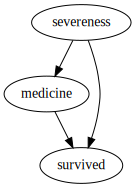

In [2]:
g = gr.Digraph()

g.edge("medicine", "survived")
g.edge("severeness", "survived")
g.edge("severeness", "medicine")

g

<br/><br/>
## Basic Terminologies for Graphs


For our purpose, it is (very) important that we understand what kind of independence and conditional independence assumptions a graphical model entails. To understand this, let's explain some common graphical definition and structures. They will be quite simple, but they are the sufficient building blocks to understand everything about graphical models.

**Graph:** A graph $G = (V, E)$ is a set V of vertices (nodes) and a set E of edges, which can be graphically illustrated, for example:

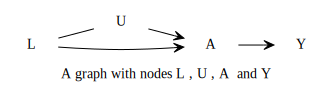

In [3]:
g = gr.Digraph(graph_attr={'rankdir':'LR', 'label': "A graph with nodes L , U , A  and Y​"}, 
               node_attr={'shape': 'plaintext'}, 
               edge_attr={'arrowhead':'vee', 'arrowsize':'1'})
g.edge("L", "U", dir = "none")
g.edge("L", "A")
g.edge("U", "A")
g.edge("A", "Y")
g



**Nodes:** typically represent random variables.

**Edges (arrows):** can be undirected, directed or bi-directed and typically indicate a certain relationship between nodes or possible direct causal effects.

**Path:** A trail of edges going from one node to another, not necessarily following the direction of arrows. a path cannot cross a node more than once.

**Cyclic Graph:** A cyclic graph has at least one path that can be followed through directed edges back to the original node​

**Acyclic Graph:** An acyclic graph is a graph that contains no such cycles.

<br/><br/>
**Example: Paths in a Graph**

What are paths from X to C in the following graph?

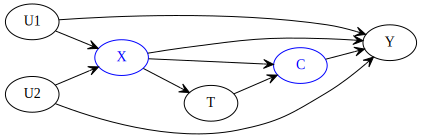

In [4]:
g = gr.Digraph(graph_attr={'rankdir':'LR'}, 
               edge_attr={'arrowhead':'vee', 'arrowsize':'1'})
g.node("X", "X", color="blue", fontcolor="blue")
g.node("C", "C", color="blue", fontcolor="blue")
g.edge("U1", "Y")
g.edge("U1", "X")
g.edge("U2", "X")
g.edge("U2", "Y")
g.edge("X", "T")
g.edge("T", "C")
g.edge("C", "Y")
g.edge("X", "C")
g.edge("X", "Y")
g

Paths from X to C are:

- $ X \rightarrow C$
- $ X \rightarrow T \rightarrow C$
- $ X \rightarrow U_2 \rightarrow Y \rightarrow C$
- $ X \rightarrow U_1 \rightarrow Y \rightarrow C$ 

**Directed Acyclic Graph (DAG):** A DAG is a graph that is both directed and acyclic.​

**Children and Parents:** Nodes directly affected by and affecting other nodes respectively.​

**Ancestors and Descendants:** Nodes directly or indirectly affected by and affecting other nodes

**Exogenous and Endogenous Nodes:** Nodes without and with parents respectively​


<br/><br/>
**Example: Parents in a Graph**

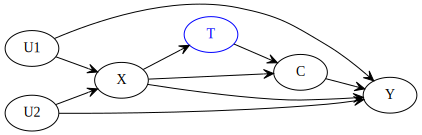

In [5]:
g = gr.Digraph(graph_attr={'rankdir':'LR'}, 
               edge_attr={'arrowhead':'vee', 'arrowsize':'1'})
g.node("T", "T", color="blue", fontcolor="blue")
g.edge("U1", "Y")
g.edge("U1", "X")
g.edge("U2", "X")
g.edge("U2", "Y")
g.edge("X", "T")
g.edge("T", "C")
g.edge("C", "Y")
g.edge("X", "C")
g.edge("X", "Y")
g

**Parents:** $pa(T) = \{ X \}$​

**Children:** $ch(T) = \{ C \}$​

**Ancestors:** $anc(T) = \{ X, U_1, U_2 \}$​

**Descendants:** $desc(T) = \{ C, Y \}$​

<br/><br/>

## DAGs for Causal Inference 

DAGs as models are mathematical objects, part of a larger class of graphical models such as Bayesian networks or Markov networks.​ DAGs graphically represent *non-parametric structural equation models*.​

- DAGs **advantages** for causal models:​

    - All pictures, no algebra​

    - Focus on causal links

    - easy for deriving nonparametric analysis


- DAGs **disadvantages** for causal models:​:

    - Don’t display the parametric assumptions that are often necessary for estimation in practice.​

    - Generality can obscure important distinctions between estimands.​

### Notes on Causal DAGs Assumptions

- Causal DAGs encode the qualitative causal assumptions of the data-generating model *model of how the world works*. 

<br/>

- Causal DAGs are **non-parametric**, i.e. they make no assumption about
  - The distribution of the variables (nodes) in the DAG
  - The functional form of the direct causal effects (arcs)

<br/>

- When we build a causal model (= drawing a DAG), we must consider all factors/variables that play a role in data generation, regardless of whether they are observed or unobserved.

  - Causal assumptions are encoded by the *direction and absence of arrows*. 
  - *Directed arrows* or arcs represent possible direct causal effects.
  - *Absence of arrows* or *missing arcs* represent sharp nulls of no-effect.

 <br/>
  
- Causal DAGs are **acyclic** because:

    - One cannot trace a sequence of arcs in the direction of the arrows and arrive where one started.
    - We impose acyclicness since a variable can’t cause itself.
    - The future cannot directly or indirectly cause the past.

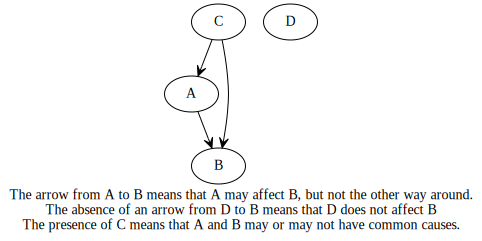

In [6]:
g = gr.Digraph( graph_attr={'label': "The arrow from A to B means that A may affect B, but not the other way around. \n " +
                                    "The absence of an arrow from D to B means that D does not affect B \n" + 
                                    "The presence of C means that A and B may or may not have common causes."}, 
            edge_attr={'arrowhead':'vee', 'arrowsize':'1'})
g.edge("C", "A")
g.edge("C", "B")
g.edge("A", "B")
g.node("D", "D")
g

### DAG Major Structure 1: Collider (V-Structure)

- A collider (also known as v-structure or head-to-head meeting) has two incoming arrows along a chosen path.

- A collider is when two arrows collide on a single variable. We can say that in this case both variables share a common effect.

  $A \!\perp\!\!\!\perp B$   

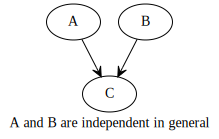

In [7]:
g = gr.Digraph(graph_attr={'label': "A and B are independent in general"}, edge_attr={'arrowhead':'vee', 'arrowsize':'1'})
g.edge("A", "C")
g.edge("B", "C")
g

- As a general rule, **conditioning (adjusting or controlling)** on a collider opens the causal path. Not conditioning on it leaves it closed.
- This phenomenon is sometimes called **explaining away**, because one cause already explains the effect, making the other cause less likely.

  $A \not\!\perp\!\!\!\perp B | C$ 

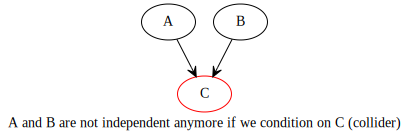

In [8]:
g = gr.Digraph(graph_attr={'label': "A and B are not independent anymore if we condition on C (collider)"}, edge_attr={'arrowhead':'vee', 'arrowsize':'1'})
g.node("C", color="red")
g.edge("A", "C")
g.edge("B", "C")
g

**Example: 6 nodes graph** In the following graph: 

- $X$ is a collider on the path $U_1 \rightarrow X \leftarrow U_2$

- $X$ is not a collider on the path $U_1 \rightarrow X \rightarrow T$

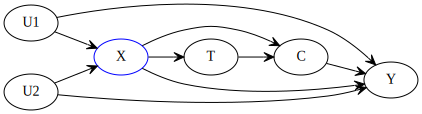

In [9]:
g = gr.Digraph(graph_attr={'rankdir':'LR'}, 
               edge_attr={'arrowhead':'vee', 'arrowsize':'1'})
g.node("X", "X", color = "blue")
g.edge("U1", "Y")
g.edge("U1", "X")
g.edge("U2", "X")
g.edge("U2", "Y")
g.edge("X", "T")
g.edge("T", "C")
g.edge("C", "Y")
g.edge("X", "C")
g.edge("X", "Y")
g

**Example: School Admission**  

We can assume there are two ways to be admitted to school. You can either be good at math or be good in arts. 

If you don't condition on the admission to school (i.e. you don't know if a student has been admitted to school), then being good in arts or maths are independent conditions. In other words, knowing that a student is good in math doens't tell anything about how good he is in arts (and viceversa). 

However, if you condition on the admission to school (i.e. you know the outcome of the admission), then being good in arts or maths become dependent. If you know that a student has been admitted to school and he is not talented in arts, then it is more likely that he is talented in math. Conversely, if he is bad at math but he has been admitted to school, then he has to be good in arts.

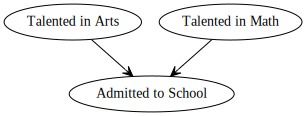

In [10]:
g = gr.Digraph(edge_attr={'arrowhead':'vee', 'arrowsize':'1'})
g.node("A", label="Talented in Arts")
g.node("B", label="Talented in Math")
g.node("C", label="Admitted to School")
g.edge("A", "C")
g.edge("B", "C")
g

**Example: Fire and Smoke Machine**  ** 

Intuitively we say that two variables are independent if knowing one variable doesn't provide any information on the other variable, i.e., it doesn't change our belief. 
Let's consider the following numerical example of a collider (similar to the previous example) where:

- $P(F=1) = 0.2$
- $P(M=1) = 0.1$
- $P(S=1|F=0; M=0) = 0.1$
- $P(S=1|F=1; M=0) = 0.8$
- $P(S=1|F=0; M=1) = 0.8$
- $P(S=1|F=1; M=1) = 0.9$

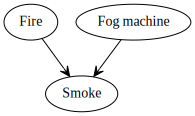

In [11]:
g = gr.Digraph(edge_attr={'arrowhead':'vee', 'arrowsize':'1'})
g.node("F", label="Fire")
g.node("M", label="Fog machine")
g.node("S", label="Smoke")
g.edge("F", "S")
g.edge("M", "S")
g

If we observe smoke ($S=1$), then the probability of fire increased to:

$$P(F=1|S=1) = \frac{P(S=1|F=1)P(F=1)}{P(S=1)} $$ 
where 
\begin{align*}
P(S=1) = P(S=1|F=0;M=0)P(F=0)P(M=0) +  \\
            P(S=1|F=1;M=0)P(F=1)P(M=0) + \\           
                P(S=1|F=0;M=1)P(F=0)P(M=1) + \\
                    P(S=1|F=1;M=1)P(F=1)P(M=1)  
\end{align*}

and 

\begin{align*}
P(S=1|F=1) = P(S=1|F=1;M=0)P(M=0) +  \\
            P(S=1|F=1;M=1)P(M=1)   
\end{align*}


$P(F=1|S=1) = 0.54$

However, if we observe that the fog machine is on, $M = 1$, then the probability of fire decreased to $P(F=1|S=1;M=1) = 0.22$.

Here, $F$ and $M$ are not conditionally independent given $S$. When the probability of one explanation increases, the alternative explanations become less probable (they are explained away).




To solve this problem, we use **bnlearn** library in Python, [here](https://pypi.org/project/bnlearn/). The orginal library was first developemd for R by Marco Scutari. The package comes with a lot of examples. [Here](https://www.bnlearn.com) is the link.

In [12]:
import bnlearn as bn
from pgmpy.factors.discrete import TabularCPD

# Define the network structure
edges = [('Fire', 'Smoke'),
         ('Machine', 'Smoke')]

# Make the DAG
DAG = bn.make_DAG(edges)

cpt_fire = TabularCPD(variable='Fire', variable_card=2, values=[[0.8], [0.2]])
cpt_machine = TabularCPD(variable='Machine', variable_card=2, values=[[0.9], [0.1]])


cpt_smoke = TabularCPD(variable='Smoke', variable_card=2,
                           values=[[0.9, 0.2, 0.2, 0.1],
                                   [0.1, 0.8, 0.8, 0.9]],
                           evidence=['Fire', 'Machine'],
                           evidence_card=[2, 2])


DAG = bn.make_DAG(DAG, CPD=[cpt_fire, cpt_machine, cpt_smoke])

bn.print_CPD(DAG)

[bnlearn] >bayes DAG created.
[bnlearn] >No changes made to existing bayes DAG.
[bnlearn] >Add CPD: Fire
[bnlearn] >Add CPD: Machine
[bnlearn] >Add CPD: Smoke
[bnlearn] >Checking CPDs..
[bnlearn] >Check for DAG structure. Correct: True
CPD of Fire:
+---------+-----+
| Fire(0) | 0.8 |
+---------+-----+
| Fire(1) | 0.2 |
+---------+-----+
CPD of Machine:
+------------+-----+
| Machine(0) | 0.9 |
+------------+-----+
| Machine(1) | 0.1 |
+------------+-----+
CPD of Smoke:
+----------+------------+------------+------------+------------+
| Fire     | Fire(0)    | Fire(0)    | Fire(1)    | Fire(1)    |
+----------+------------+------------+------------+------------+
| Machine  | Machine(0) | Machine(1) | Machine(0) | Machine(1) |
+----------+------------+------------+------------+------------+
| Smoke(0) | 0.9        | 0.2        | 0.2        | 0.1        |
+----------+------------+------------+------------+------------+
| Smoke(1) | 0.1        | 0.8        | 0.8        | 0.9        |
+-----

In [13]:
q1 = bn.inference.fit(DAG, variables=['Fire'], evidence={'Smoke':1} )

[bnlearn] >Variable Elimination..


Eliminating: Machine: 100%|██████████| 1/1 [00:00<00:00, 1001.74it/s]

+----+--------+----------+
|    |   Fire |        p |
+====+========+==========+
|  0 |      0 | 0.456376 |
+----+--------+----------+
|  1 |      1 | 0.543624 |
+----+--------+----------+


In [14]:
q2 = bn.inference.fit(DAG, variables=['Fire'], evidence={'Smoke':1, 'Machine':1} )

[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+----+--------+----------+
|    |   Fire |        p |
+====+========+==========+
|  0 |      0 | 0.780488 |
+----+--------+----------+
|  1 |      1 | 0.219512 |
+----+--------+----------+


### DAG Major Structure 2: Fork (Confounder)

- A fork (or Confounder) is a node $C$ in a graph that has outgoing edges to two (or more) other variables $A$ and $B$.
- Fork $C$ causes cofounding. Confounding means that $A$ and $B$ have a common cause (direct or indirect). 
- Fork $C$ is a common cause of $A$ and $B$. 

    $A \not\!\perp\!\!\!\perp B$ 



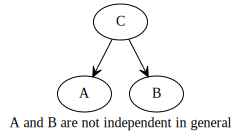

In [15]:
g = gr.Digraph(graph_attr={'label': "A and B are not independent in general"}, edge_attr={'arrowhead':'vee', 'arrowsize':'1'})
g.edge("C", "A")
g.edge("C", "B")
g

- In fork structure, the dependence flows backward through the arrows and we have what is called a **backdoor path**. 
- We can close the backdoor path and shut down dependence by conditioning on the common cause.

    $A \!\perp\!\!\!\perp B | C$ 

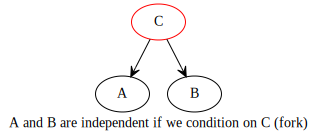

In [16]:
g = gr.Digraph(graph_attr={'label': "A and B are independent if we condition on C (fork)"}, edge_attr={'arrowhead':'vee', 'arrowsize':'1'})
g.node("C", color="red")
g.edge("C", "A")
g.edge("C", "B")
g

**Example: Summer hot temperatures** 

We can consider the high temperature to influence the ice-cream consumption and number of solarburns. 

If you don't know whether it is summer (hot) or winter (cold), ice-cream consumption and number of solarburns are dependent (i.e., if we plot one w.r.t. the other we see a correlation). 
On the other hand, if we condition on the temperature (i.e. we know the temperature and if it is summer or winter), ice-cream consumption and number of solarburns become independent.

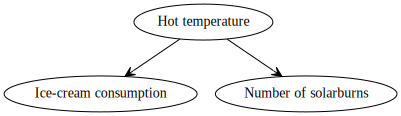

In [17]:
g = gr.Digraph(edge_attr={'arrowhead':'vee', 'arrowsize':'1'})
g.node("A", label="Ice-cream consumption")
g.node("B", label="Number of solarburns")
g.node("C", label="Hot temperature")
g.edge("C", "A")
g.edge("C", "B")
g

In [18]:
edges = [('Hot', 'Ice-cream'),
         ('Hot', 'Solarburn')]

# Make the actual Bayesian DAG
DAG = bn.make_DAG(edges)

cpt_icecream= TabularCPD(variable='Ice-cream', variable_card=2, values=[[0.7, 0.4],[0.3, 0.6]], evidence = ['Hot'], evidence_card=[2])
cpt_solarburn = TabularCPD(variable='Solarburn', variable_card=2, values=[[0.9, 0.4],[0.1, 0.6]], evidence = ['Hot'], evidence_card=[2])

cpt_hot = TabularCPD(variable='Hot', variable_card=2, values=[[0.5], [0.5]])

DAG = bn.make_DAG(DAG, CPD=[cpt_icecream, cpt_solarburn, cpt_hot])
bn.print_CPD(DAG)

[bnlearn] >bayes DAG created.
[bnlearn] >No changes made to existing bayes DAG.
[bnlearn] >Add CPD: Ice-cream
[bnlearn] >Add CPD: Solarburn
[bnlearn] >Add CPD: Hot
[bnlearn] >Checking CPDs..
[bnlearn] >Check for DAG structure. Correct: True
CPD of Ice-cream:
+--------------+--------+--------+
| Hot          | Hot(0) | Hot(1) |
+--------------+--------+--------+
| Ice-cream(0) | 0.7    | 0.4    |
+--------------+--------+--------+
| Ice-cream(1) | 0.3    | 0.6    |
+--------------+--------+--------+
CPD of Solarburn:
+--------------+--------+--------+
| Hot          | Hot(0) | Hot(1) |
+--------------+--------+--------+
| Solarburn(0) | 0.9    | 0.4    |
+--------------+--------+--------+
| Solarburn(1) | 0.1    | 0.6    |
+--------------+--------+--------+
CPD of Hot:
+--------+-----+
| Hot(0) | 0.5 |
+--------+-----+
| Hot(1) | 0.5 |
+--------+-----+
[bnlearn] >Independencies:
(Solarburn ⟂ Ice-cream | Hot)
(Ice-cream ⟂ Solarburn | Hot)
[bnlearn] >Nodes: ['Hot', 'Ice-cream', 'Solarburn

In [19]:
q1 = bn.inference.fit(DAG, variables=['Ice-cream'], evidence={'Hot':1} )

[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+----+-------------+-----+
|    |   Ice-cream |   p |
+====+=============+=====+
|  0 |           0 | 0.4 |
+----+-------------+-----+
|  1 |           1 | 0.6 |
+----+-------------+-----+


In [20]:
q2 = bn.inference.fit(DAG, variables=['Ice-cream'], evidence={'Solarburn':1, 'Hot':1} )

[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+----+-------------+-----+
|    |   Ice-cream |   p |
+====+=============+=====+
|  0 |           0 | 0.4 |
+----+-------------+-----+
|  1 |           1 | 0.6 |
+----+-------------+-----+


### DAG Major Structure 3: Mediator (Chain)

- A node $C$ is a mediator if it lies on a directed path from $A$ to $B$.
- As a general rule, the dependence flow in the direct path from $A$ to $B$ is blocked when we condition on an intermediary variable $C$.

  - $A \not\!\perp\!\!\!\perp B$   

  - $A \!\perp\!\!\!\perp B | C$ 


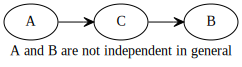

In [21]:
g = gr.Digraph(graph_attr={'rankdir':'LR', 'label': "A and B are not independent in general"}, edge_attr={'arrowhead':'vee', 'arrowsize':'1'})
g.edge("A", "C")
g.edge("C", "B")
g

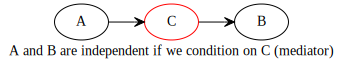

In [22]:
g = gr.Digraph(graph_attr={'rankdir':'LR', 'label': "A and B are independent if we condition on C (mediator)"}, edge_attr={'arrowhead':'vee', 'arrowsize':'1'})
g.node("C", color="red")
g.edge("A", "C")
g.edge("C", "B")
g

**Example: Throwing Dices** 

Let's assume we are throwing dices. If we don't know (i.e. we don't condition) the sum in the first $n$ throws, then knowing the sum we got in the first $n-1$ throws helps us in better estimating the sum in the $n+1$ throws.

However, if we condition (i.e. we observe) on the sum in the first $n$ throws, then knowing the sum in $n-1$ throws doesn't provide any information in better estimating the sum in $n+1$ thorws. 

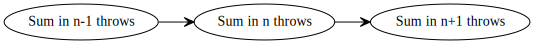

In [23]:
g = gr.Digraph(graph_attr={'rankdir':'LR'}, edge_attr={'arrowhead':'vee', 'arrowsize':'1'})
g.node("A", label="Sum in n-1 throws")
g.node("B", label="Sum in n throws")
g.node("C", label="Sum in n+1 throws")
g.edge("A", "B")
g.edge("B", "C")
g

## DAG Major Structure 4: Causal Paths

A causal path is a route between two variables, following the direction of arrows. The causal path from $X$ to $C$ mediate the causal effect of $X$ on $C$, the non-causal path do not.

For example in the graphs below, the causal path between $X$ and $C$ are highlighted in red.

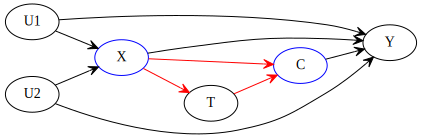

In [24]:
g = gr.Digraph(graph_attr={'rankdir':'LR'}, 
               edge_attr={'arrowhead':'vee', 'arrowsize':'1'})
g.node("X", "X", color = "blue")
g.node("C", "C", color = "blue")
g.edge("U1", "Y")
g.edge("U1", "X")
g.edge("U2", "X")
g.edge("U2", "Y")
g.edge("X", "T", color="red")
g.edge("T", "C", color="red")
g.edge("C", "Y")
g.edge("X", "C", color="red")
g.edge("X", "Y")
g

### Path Blocking Rules

Path are either open or blocked, according to two rules:

- **Rule 1:** A path is blocked if somewhere along the path there is a variable $C$ that sits in a *chain*, or sits in a *fork* and we have conditioned for $C$. 

- **Rule 2:** A path is blocked if somewhere along the path there is a variable $C$ that sits in a *collider* and we have not conditioned for $C$, or any of its descendents.

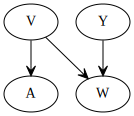

In [25]:
g = gr.Digraph(edge_attr={'arrowhead':'vee', 'arrowsize':'1'})
g.edge("V", "A")
g.edge("V", "W")
g.edge("Y", "W")
g

From the causal graph above we notice that:
- Conditioning for **V** blocks the path from **A** to **W** (rule 1) 
- Conditioning for **W** leaves the path open (rule 2) from **A** to **Y**. 
- Conditioning for both **V** and **W** blocks the path from **A** to **Y**.

### Path Blocking and D-Separation 

**d-separation in Sets:** Sets of variables $A$ and $B$ are d-separated (or blocked) by $C$ if all paths between $A$ and $B$ are blocked by $C$. d-separation implies: 

$A \perp \!\!\! \perp B | C$.

<br/>

**d-separation in Paths:** D-separation determines which paths transmit association, and which ones don’t.
Formally, a path **P** is said to be d-separated (or blocked) by a conditioning set of nodes $\{Z\}$ if:

1. **P** contains a chain $A \rightarrow M \rightarrow B$ or a fork $A \leftarrow M \rightarrow B$ such that the middle node $M$ is in $\{Z\}$, or
2. **P** contains a collider $A \rightarrow M \leftarrow B$ such that neither the middle node $M$, nor any descendant of $M$, is in $\{Z\}$.

<br/>

**d-connected in Paths:** A path **P** is said to be d-connected (or unblocked or open) by a conditioning set of nodes $\{Z\}$ if it is not d-separated.


In other words:

- *Blocked* (d-separated) paths don’t transmit association (information). 

- *Unblocked* (d-connected) paths may transmit association (information).


<br/><br/>
The three aforementioned blocking criteria can be rephased as: 

- Conditioning on a non-collider blocks a path, 

- Conditioning on a collider, or a descendent of a collider, unblocks a path, 

- Not conditioning on a collider leaves a path “naturally” blocked.

<br/>

### Path Blocking and Independence 

- Two variables that are d-separated along all paths given $\{Z\}$ are <font color='red'>conditionally independent given $\{Z\}$.</font>

- Two variables that are *NOT* d-separated along all paths given $\{Z\}$ are <font color='red'>potentially dependent given $\{Z\}$.</font>

## Example for D-Separation 

We use the following DAG from [Bardy Neal course](https://www.bradyneal.com/causal-inference-course) to see blocked and un-blocked pathes between $T$ and $Y$ for different controlling (conditioning) cases.

![img](img/ch3/graph_Dsep_example_case0.png)

<br/><br/>
**Case 1:** In the following graph, is  $T \perp \!\!\! \perp Y | M_1$  valid?

![img](img/ch3/graph_Dsep_example_case1.png)




**NO!**, 
- the chain path $T-M_1-M_2-Y$ is blocked ($M_1$ is in the conditioning set) 
- the fork path $T-W_1-W_2-W_3-Y$ is not blocked.
- the collider path $T-X_1-X_2-X_3-Y$ is blocked.

<br/><br/>
**Case 2:** In the following graph, is  $T \perp \!\!\! \perp Y | M_1, W_2 $  valid?  

![img](img/ch3/graph_Dsep_example_case2.png)


**YES!**, 
- the chain path $T-M_1-M_2-Y$ is blocked ($M_1$ is in the conditioning set) 
- the fork path $T-W_1-W_2-W_3-Y$ is blocked ($W_2$ is in the conditioning set).
- the collider path $T-X_1-X_2-X_3-Y$ is blocked.

<br/><br/>
**Case 3:** In the following graph, is  $T \perp \!\!\! \perp Y | M_1, W_3 $  valid?  

![img](img/ch3/graph_Dsep_example_case3.png)

**YES!**,
- the chain path $T-M_1-M_2-Y$ is blocked ($M_1$ is in the conditioning set). 
- the fork path $T-W_1-W_2-W_3-Y$ is blocked ($W_3$ is in the conditioning set).
- the collider path $T-X_1-X_2-X_3-Y$ is blocked.

<br/><br/>
**Case 4:** In the following graph, is  $T \perp \!\!\! \perp Y | M_1, W_1, W_2, X_2$  valid?  

![img](img/ch3/graph_Dsep_example_case4.png)

**NO!**,
- the chain path $T-M_1-M_2-Y$ is blocked ($M_1$ is in the conditioning set). 
- the fork path $T-W_1-W_2-W_3-Y$ is blocked ($W_2, W_3$ are in the conditioning set).
- the collider path $T-X_1-X_2-X_3-Y$ is NOT blocked ($X_2$ is in the conditioning set)

<br/><br/>
**Case 5:** In the following graph, is  $T \perp \!\!\! \perp Y | M_1, W_2, W_3, X_1, X_2?$  valid?

![img](img/ch3/graph_Dsep_example_case5.png)

**YES!**,
- the chain path $T-M_1-M_2-Y$ is blocked ($M_1$ is in the conditioning set). 
- the fork path $T-W_1-W_2-W_3-Y$ is blocked ($W_2, W_3$ are in the conditioning set).
- the collider path $T-X_1-X_2-X_3-Y$ is blocked ($X_1$ is in the conditioning set)

### Automatic d-separation test

Testing the d-separation manually is not feasible for large graphs.
We can use the *networkx* library instead to test for conditional independence.

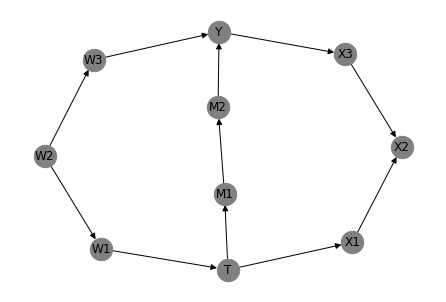

In [11]:
import networkx as nx

G = nx.DiGraph()
G.add_edges_from(
    [
        ("T", "M1"),
        ("M1", "M2"),
        ("M2", "Y"),
        #
        ("T", "X1"),
        ("X1", "X2"),
        ("Y", "X3"),
        ("X3", "X2"),
        #
        ("W1", "T"),
        ("W2", "W1"),
        ("W2", "W3"),
        ("W3", "Y"),
    ]
)
pos = nx.nx_agraph.graphviz_layout(G, prog="neato")
options = {
    'node_color': 'gray',
    'node_size': 500,
    'width': 1,
    'arrowstyle': '-|>',
    'arrowsize': 12,
    }
nx.draw(G, pos, with_labels=True, **options)

In [6]:
#Is T and Y d-separated given M1? 
nx.d_separated(G, {"T"}, {"Y"}, {"M1"})

False

In [7]:
#Is T and Y d-separated given M1 and W2? 
nx.d_separated(G, {"T"}, {"Y"}, {"M1", "W2"})

True

## Causal Assumptions

Causal DAGs need additional assumptions to be useful. These assumptions narrow down the possible solutions and hopefully makes the problem solvable. 

There are four common assumptions made across causal discovery algorithms. 

 1) **Acyclicity** — causal structure can be represented by a DAG $\mathcal{G}$. We already seen that.

 2) **Markov Property** — all nodes are independent of their non-descendants when conditioned on their parents. 

 3) **Faithfulness** — all conditional independences in true underlying distribution $p$ are represented in $\mathcal{G}$ 

 4) **Sufficiency** — any pair of nodes in $\mathcal{G}$ has no common external cause.

<br/>

A comprehensive discussion of these causal assumptions is availabe  in [Kalainathan et al., 2018]( https://arxiv.org/abs/1803.04929)



## Markov Property
### Definition of Markov Property


- **When a distribution $p$ is Markovian with respect to a graph $\mathcal{G}$, this graph encodes certain independence in the distribution.** 

- Markov property links causal DAGs to conditional probabilities (from data).

We use two basic definitions before explaining Markov property:

<br/>

**Chain Rule:** We know from the definition of conditional probability that: 

$$P(X_1,X_2) = P(X_1|X_2) \cdot P(X_2) = P(X_2|X_1) \cdot P(X_1)$$

This can be generalied to multiple events (random variables): 

$$
\mathrm{P}\left(X_n, \ldots, X_1\right) = \mathrm{P}\left(X_n \mid X_{n-1}, \ldots, X_1\right) \cdot \mathrm{P}\left(X_{n-1}, \ldots, X_1\right)
$$

Repeating this process with each final term creates the product form:

$$
\mathrm{P}\left(X_n, \ldots, X_1\right) = \mathrm{P}\left(\bigcap_{k=1}^n X_k\right) = \prod_{k-1}^n \mathrm{P}\left(X_k \mid \bigcap_{j=1}^{k-1} X_j\right)
$$

<br/>

**Conditional Independence:** Now let's $X,Y,Z$ be three random variables.

- $X$ and $Y$ *are (marginally) independent* if: 

$$X \perp Y \Leftrightarrow  P(X,Y) = P(X) \cdot P(Y)$$

<br/>

- $X$ and $Y$ *are conditionally independent* if: 

$$X \perp Y|Z \Leftrightarrow  P(X, Y| Z) = P(X|Z) \cdot P(Y|Z)$$ 

<br/>

- Conditional Independence mathematically is equivalent to the statement that: *the joint distribution of the variables $X = \{ X_1 , X_2 , ..., X_n \}$ in a DAG $\mathcal{G}$ can be factorized using the Markov factorization or Bayesian Network Factorization given parents $pa$ of ecah variable*:

$$P(X) = \prod_{i=1}^n P(X_i|pa(X_i))$$

- In other words:
    - Conditional on its parents, a variable $X_i$ is independent of its predecessors variables (conditional independence). 
    - Parents of $X_i$  or $pa(X_i)$ are independent aspects of the mechanism that generated $X_i$ values (data).  

<br/><br/>

<div class="alert alert-block alert-info">

**Definition 3.1 (Markov Property):** Given a DAG $\mathcal{G}$ and a joint distribution $P_X$, this distribution is said to satisfy:

<br/>

(a) the **global Markov property** with respect to the DAG $\mathcal{G}$ if:

$$\mathbf{A} \!\perp\!\!\!\perp_{\mathcal{G}} \mathbf{B}|\mathbf{C} \Rightarrow \mathbf{A} \!\perp\!\!\!\perp \mathbf{B}|\mathbf{C}$$


for all disjoint vertex sets $A,B,C$, the symbol $\!\perp\!\!\!\perp_{\mathcal{G}}$ denotes d-separation.

<br/>

(b) the **local Markov property** with respect to the DAG $\mathcal{G}$ if each variable is independent of its predecessors given its parents, and

<br/>

(c) the **Markov factorization property** with respect to the DAG $\mathcal{G}$ if

$$
p(\mathbf{x})=p\left(x_{1}, \ldots, x_{n}\right)=\prod_{i=1}^{n} p\left(x_{i} \mid \mathbf{p} \mathbf{a}_{i}^{\mathcal{G}}\right)
$$

For this last property, we have to assume that $P_X$ has a density $p$; the factors in the product are referred to as causal Markov kernels describing the conditional distributions $P_{X_{i} \mid \mathbf{PA}_{i}^{\mathcal{G}}}$


</div>

### Truncated Factorization

An extension to Markov factorization is that the probability distribution generated by an intervention. For example, $do( X_1 = x_1 )$ is given by a Truncated Factorization:

$$P(X_2, \dots, X_n |do(X_1 = x_1)) = \prod_{i \neq 1} P(X_i | pa(X_i))$$

**Truncated Factorization** suggested by (Pearl, 1993) is also known as the **G-formula** (Robins, 1986), or **manipulation theorem** (Spirtes, 2000), or **intervention formula** (Lauritzen, 2002).

We have $X = \{ X_1, X_2 , X_3 , ..., X_n \}$, the causal effect of $X_1$ on $X_2$ can now be derived by marginalizing (summing) the truncated factorization over $X' = \{ X_3 , ..., X_n \}$:

$$P(X_2|do(X_1=x_1)) = \sum_{x'} P(X_2, X'|do(X_1=x_1))$$

<br/><br/>

See an example in this short [video](https://www.youtube.com/watch?v=_gcmY5ukbWM) made by [Brady Neal](https://www.bradyneal.com/causal-inference-course).


### Local Markov Assumption in a Graph

Given its parents in the DAG, a node $X$ is independent of all its predecessors. For example, let consider the graph below.

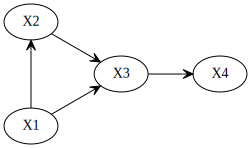

In [26]:
g=gr.Digraph(edge_attr={'arrowhead':'vee', 'arrowsize':'1'}, graph_attr={'rankdir': 'LR', 'layout':'circo'})
g.edge("X1", "X2")
g.edge("X1", "X3")
g.edge("X2", "X3")
g.edge("X3", "X4")
g

In the graph above, we have:

$$
P(x_1, x_2, x_3, x_4) = P(x_1) P(x_2|x_1) P(x_3| x_2,x_1) P(x_4 | x_3, x_2, x_1)
$$

What happens with the *Local Markov Assumption*?

$$
P(x_1, x_2, x_3, x_4) = P(x_1) P(x_2|x_1) P(x_3| x_2,x_1) \underbrace{P(x_4 | x_3, x_2, x_1)}_{P(x_4 | x_3)}
$$


### D-separation vs. Conditional independence

We saw that DAGs offer an efficient (and visually easier) way to factorize the joint probability between random variables.
We present here a summary of the cases we presented:

- $A$ and $B$ are **marginally dependent**  ($A \not \perp B$)
 $$P(A,B) \neq P(A) \cdot P(B)$$
![img](img/ch3/DAGs_PDFs_marginallyDep.png)

- $A$ and $B$ are **marginally independent**  ($A \perp B$)
 $$P(A,B) = P(A) \cdot P(B)$$
![img](img/ch3/DAGs_PDFs_marginallyIndep.png)


- $A$ and $B$ are **conditionally independent given $C$**  ($A \perp B | C$)
 $$P(A,B|C) = P(A|C) \cdot P(B|C)$$
![img](img/ch3/DAGs_PDFs_conditionallyIndep.png)


- $A$ and $B$ are **conditionally dependent given $C$**  ($A \not \perp B | C$)
 $$P(A,B|C) \neq P(A|C) \cdot P(B|C)$$
![img](img/ch3/DAGs_PDFs_conditionallyDep.png)


Two (sets of) nodes $X$ and $Y$ are d-separated by a set of nodes $\{Z\}$ if all the paths between (any node in) $X$ and (any node in) $Y$ are blocked by $\{Z\}$. 
d-separation implies independence. 

<div class="alert alert-block alert-info">

**Theorem 3.2. (Global Markov Assumption):** Given that distribution $P$ is Markov with respect to graph $\mathcal{G}$, d-separation in a graph $\mathcal{G}$ is equivalent of conditional independent in distribution $P$. This is also called *Global Markov assumption*.

$X \!\perp\!\!\!\perp_G Y |\{Z\} \Rightarrow X \!\perp\!\!\!\perp_P Y |\{Z\}$

Because of d-separation, we can read it $P$ is Markov with respect to $\mathcal{G}$ or $P$ satisfy Markov assumption in respect to $\mathcal{G}$.

</div>

### Markov Equivalence

We saw that chains and forks seem to encode the same independencies. They seem to be, in some way, equivalent to each other. We formalize here this concept.

First, we introduce two important graph qualities that we can use to distinguish equivalent graphs: 

- **Skeleton:** an undirected graph obtained by removing directions 

- **Immorality (v-structure or collider):** a collider structure A → C ← B, such that there is no direct edge between A and B 


<br/><br/>

<div class="alert alert-block alert-info">

**Definition 3.3. (Markov Equivalence of Graphs)):** We denote by $\mathcal{M}(\mathcal{G})$ the set of distributions that are Markovian with respect to $\mathcal{G}$ :

$\mathcal{M}(\mathcal{G})$ = {$P$ : $P$ satisfies the global (or local) Markov property with respect to $\mathcal{G}$}.

Two DAGs $\mathcal{G_1}$ and $\mathcal{G_2}$ are **Markov equivalent** if $\mathcal{M}(\mathcal{G_1})$ = $\mathcal{M}(\mathcal{G_2})$. 

* This is the case if and only if $\mathcal{G_1}$ and $\mathcal{G_2}$ satisfy the same set of d-separations, which means the Markov condition entails the same set of (conditional) independence conditions.
* The set of all DAGs that are Markov equivalent to the same distribution is called **Markov equivalence class of $\mathcal{G}$**. 

</div>

<br/><br/>

<div class="alert alert-block alert-info">

**Lemma 3.4. (Graphical criteria for Markov equivalence):** Two DAGs $\mathcal{G_1}$ and $\mathcal{G_2}$ are Markov equivalent if and only if they have the same skeleton and the same immoralities.

   - Two graphs are Markov equivalent, if they entail the same conditional independencies. 
   - Two Markov equivalent graphs can be used for representing the same set of probability distributions.

</div>

<br/><br/>

Following figure shows an example of two Markov equivalent graphs.

![img](img/ch3/Markov_equivalent.png)


<br/>

See a short video on [Markov Equivalence](https://www.youtube.com/watch?v=nnjKCtdORwY&list=PLoazKTcS0Rzb6bb9L508cyJ1z-U9iWkA0&index=64) made by Brady Neal.

You can use the [pgmpy](https://pgmpy.org/index.html) librarty to work with DAGs.


In [1]:
from pgmpy.base import DAG
import graphviz as gr

G1 = DAG()
G1.add_edges_from([('X', 'Y'), ('X', 'Z'),
                  ('Z', 'Y'), 
                  ('V', 'Z'),
                  ('U','V')])

G2 = DAG()
G2.add_edges_from([('X', 'Y'), ('X', 'Z'),
                  ('Z', 'Y'), 
                  ('V', 'Z'),
                  ('V','U')])


def plot_from_model_pgmpy(edges):
    # plot
    edges = [el for el in edges] #unpack
    g = gr.Digraph()
    
    for i in range(0, len(edges)):
        g.edge(edges[i][0],edges[i][1])
    return g

# Plot the DAG
g1 = plot_from_model_pgmpy(G1.edges())
g2 = plot_from_model_pgmpy(G2.edges())

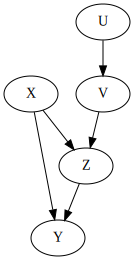

In [2]:
g1

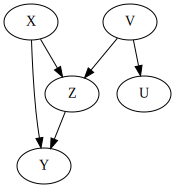

In [3]:
g2

Are they equivalent?

In [18]:
G1.is_iequivalent(G2)

True

Which are the immoralities?

In [4]:
G1.get_immoralities()

{('V', 'X')}

In [5]:
G2.get_immoralities()

{('V', 'X')}

## Markov Blanket

The **Markov blanket** of a node $X$, denoted by $MB(X)$, consists of the children, parents and spouses (parents of children) of $X$. 
- $MB(X)$ is a subset that contains all the useful information about $X$. 
- $X$ is conditionally independent of all nodes outside its Markov blanket given its Markov blanket:

$X \!\perp\!\!\!\perp N \setminus MB(X) | MB(X)$

![img](img/ch3/Markov_blanket.png)


Get the Markov blanket of a node for the previous graph G1:

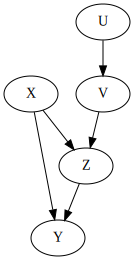

In [22]:
g1

In [6]:
G1.get_markov_blanket('Z')

['Y', 'X', 'V']

## Common Cause Principle

So far, we have discussed the Markov property as the connecting factor for distributions and graphs. Now, we discuss some of its causal implications. 

We can use Markov property to justify **Reichenbach’s Common Cause Principle**. It states that when the random variables $X$ and $Y$ are dependent, there must be a *causal explanation* for this dependence:

- $X$ is (possibly indirectly) causing $Y$, or 
- $Y$ is (possibly indirectly) causing $X$, or
- there is a (possibly unobserved) common cause $Z$ that (possibly indirectly) causes both $X$ and $Y$.

The following proposition justifies Reichenbach’s principle with respect to a notion of “causing,” namely the existence of a directed path.

<br/><br/>

<div class="alert alert-block alert-info">

**Proposition 3.5. (Reichenbach’s Common Cause Principle):** Assume that any pair of variables $X$ and $Y$ can be embedded into a larger system in the following sense. There exists a **causal model** over the collection $\mathbf{X}$ of random variables that contains $X$ and $Y$ within graph $\mathcal{G}$. Then Reichenbach’s common cause principle follows from the Markov property. If $X$ and $Y$ are dependent, then there is:

<br/>

- either a directed path from $X$ to $Y$ , or 

<br/>

- a directed path from $Y$ to $X$,or 

<br/>

- there is a node $Z$ with a directed path from $Z$ to $X$ and from $Z$ to $Y$.

</div>

## Causal Graphical Models

<div class="alert alert-block alert-info">

**Proposition 3.6. (Causal Model vs. Markov Property):** [Source](https://mitpress.mit.edu/books/elements-causal-inference) Assume that $P_X$ is induced by an Structural causal Model (SCM) with graph $\mathcal{G}$. Then, $P_X$ is Markovian with respect to $\mathcal{G}$. The assumption that says a distribution is Markovian with respect to the causal graph is sometimes called the **causal Markov condition**. 

</div>

<br/>

We will see in the next chapter that it is sufficient to know the observational data distribution and the related graph structure for defining intervention distributions for a process. Therefore, we define a causal graphical model as a pair consisting of a *graph* and an *observational distribution* such that the distribution is Markovian with respect to the graph (causal Markov condition).

<br/>

<div class="alert alert-block alert-info">

**Definition 3.7 (Causal graphical model):** A causal graphical model over random variables $\mathbf{X}=\left(X_{1}, \ldots, X_{d}\right)$ contains a graph $\mathcal{G}$ and a collection of functions $f_{j}\left(x_{j}, x_{\mathbf{P A}_{j}^{\mathcal{G}}}\right)$ that integrate to $1:$

$$
\int f_{j}\left(x_{j}, x_{\mathbf{P A}_{j}^{\mathcal{G}}}\right) d x_{j}=1
$$

These collection (structure) of functions induces a distribution $P_{\mathbf{X}}$ over $\mathbf{X}$ via

$$
p\left(x_{1}, \ldots, x_{d}\right)=\prod_{j=1}^{d} f_{j}\left(x_{j}, x_{\mathbf{PA_j}}^{\mathcal{G}}\right)
$$

and thus play the role of conditionals: 

$$
f_{j}\left(x_{j}, x_{\mathbf{PA_j^\mathcal{G}}}\right) = p\left(x_{j} \mid x_{\mathbf{PA_j}^\mathcal{G}}\right)
$$

Refer to [Causal Elements Book, Chapter 6](https://mitpress.mit.edu/books/elements-causal-inference) for proof.
</div>

<br/>

If a distribution $P_X$ over $X$ is Markovian with respect to a graph $\mathcal{G}$ and allows for a strictly positive, continuous density $p$, the pair $(P_X,\mathcal{G})$ defines a **causal graphical model** by:

$$
f_j\left(x_{j} \mid x_{\mathbf{PA_j}^\mathcal{G}}\right) = p\left(x_{j} \mid x_{\mathbf{PA_j}^\mathcal{G}}\right)
$$


<br/>

See a short video on [Causal Graphs](https://www.youtube.com/watch?v=vjvP9oRgZyM&list=PLoazKTcS0Rzb6bb9L508cyJ1z-U9iWkA0&index=21) made by Brady Neal.


## Faithfulness and Causal Minimality


As we seen, the **Markov** assumption enables us to undrestand **independences** from a graph structure. **Faithfulness** allows us to infer **dependences** from the graph structure.


<div class="alert alert-block alert-info">

**Definition 3.8 (Faithfulness and causal minimality):** Consider a distribution $P_\mathbf{X}$ and a DAG $\mathcal{G}$.
    
**(a)** $P_\mathbf{X}$ is faithfulls to DAG $\mathcal{G}$ if

$$
\mathbf{A} \!\perp\!\!\!\perp \mathbf{B}\left|\mathbf{C} \Rightarrow \mathbf{A} \!\perp\!\!\!\perp_{\mathcal{G}} \mathbf{B}\right| \mathbf{C}
$$

for all  all disjoint vertex sets $\mathbf{A}, \mathbf{B}, \mathbf{C}$.

**(b)** A distribution satisfies causal minimality with respect to $\mathcal{G}$ if it is Markovian with respect to $\mathcal{G}$, but not to any proper subgraph of $\mathcal{G}$.
</div>

<br/>

Part (a) posits an implication that is the opposite of the global Markov condition:

$$
\mathbf{A} \!\perp\!\!\!\perp_{\mathcal{G}} \mathbf{B}|\mathbf{C} \Rightarrow \mathbf{A} \!\perp\!\!\!\perp \mathbf{B}| \mathbf{C},
$$

<div class="alert alert-block alert-info">

**Proposition 3.9 (Faithfulness implies causal minimality):** If $P_\mathbf{X}$ is faithful and Markovian with respect to $\mathcal{G}$, then causal minimality is satisfied.
    
</div>

A distribution is minimal with respect to $\mathcal{G}$ if and only if there is no node that is conditionally independent of any of its parents, given the remaining parents.


Pass

## Interventional Sufficiency

A set of variables $P_\mathbf{X}$ is usually said to be **causally sufficient** if there is no hidden common cause $C \notin \mathbf{X}$ that is causing more than one variable in $\mathbf{X}$.

- The definition **causally sufficient** matches the intuitive meaning of the set of “relevant” variables. However, it uses the concept of a **common cause** and should therefore be understood relative to a larger set of variables $\tilde{\mathbf{X}} \supseteq \mathbf{X}$.

- In the structural causal model corresponding to this larger set $\tilde{\mathbf{X}}$ , a variable $C$ is a **common cause** of $X$ and $Y$ if there is a directed path from $C$ to $X$ and $Y$ that does not include $Y$ and $X$, respectively.

- **Common causes** are also called **confounders** and we use these terms interchangeably.


<div class="alert alert-block alert-info">

**Definition 3.10 (Interventional sufficiency):** We call a set $\mathbf{X}$ of variables interventionally sufficient if there exists an SCM over $\mathbf{X}$ that cannot be falsified as an interventional model. It also induces (create) observational and intervention distributions that coincide with what we observe in practice.

</div>

**Interventional sufficiency** describes when a set of variables is large enough to perform causal reasoning, in the sense of computing observational and intervention distributions.

For more information on Interventional sufficiency, see Chapter 9. Hidden Variables from [Elements of Causal Inference](https://mitpress.mit.edu/books/elements-causal-inference) book.




<font color='blue'> **Note:** What we saw is part of the math under the hook! In this course, we are focused on using causal DAGs. However, DAGs can still be of great practical use without detailed knowledge of this mathematical background. If you want to know more in-depth math, see Judea Pearl's paper [Foundations of Causal Inference, 2010](https://ftp.cs.ucla.edu/pub/stat_ser/r355-reprint.pdf) and books we suggested in the syllabus. </font>


## References

This chapter contents are highly inspired by the [Elements of Causal Inference (Open Access) book](https://mitpress.mit.edu/books/elements-causal-inference) by By Jonas Peters, Dominik Janzing and [Bernhard Schölkopf](https://www.is.mpg.de/~bs) especially for definitions and propositions.

We also used a graph example from the [Introduction to Causal Inference](https://www.bradyneal.com/causal-inference-course) course by Brady Neal. He made a very nice open-access online course accompanied by videos on [YouTube](https://youtube.com/playlist?list=PLoazKTcS0Rzb6bb9L508cyJ1z-U9iWkA0).

More proofs and theores can ber find in Judea Pearl's [Causal Inference in Statistics: A Primer](https://www.wiley.com/en-us/Causal+Inference+in+Statistics%3A+A+Primer-p-9781119186847).
